# Computer Vision Assignments: Sessions 1 & 2

This notebook contains tasks and assignments based on Sessions 1 and 2. You are required to implement the functions and complete the exercises as described. Use OpenCV and other necessary libraries like NumPy and Matplotlib.

**Instructions:**
- Complete each task in the provided code cells.
- Test your implementations with sample images (e.g., download test images [here](https://sipi.usc.edu/database/database.php?volume=misc) or [here](https://www.hlevkin.com/hlevkin/06testimages.htm) or use your own test images).
- Include comments in your code for clarity.
- Display results using cv2.imshow() or Matplotlib where appropriate.
- Submit the completed notebook along with any output images or explanations on [our google drive for the CV sessions](https://drive.google.com/drive/folders/1IjVhJmAXxNQTGT-ybJ-yc5smYtR5v8CO?usp=sharing) **upload your files in a new folder under your name**

## Session 1: Basic Image Operations (Reading, Resizing, Cropping, Rotating)

### Task 1: Read and Display an Image
Read an image from a file and display it in both BGR and grayscale formats. Handle errors if the image cannot be read.

In [1]:
import cv2 as cv
import numpy as np
import sys
import matplotlib.pyplot as plt
%matplotlib inline

# Your code here
path = r'OIP.jpeg'  # Replace with your image path

# Read in BGR
img= cv.imread(path)

# Read in Grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Display both using cv.imshow() or plt.imshow()
cv.imshow('BGR Image', img)
cv.imshow('Grayscale Image', gray)
cv.waitKey(0)
cv.destroyAllWindows()



### Task 2: Resize Image with Aspect Ratio Preservation
Implement resizing while preserving aspect ratio. Downscale to 60% and upscale to 200%. Compare shapes and display originals vs resized.

In [2]:
# Your code here
# Load image
# Downscale to 60%
import cv2


Scale_percent = 60
h, w, _ = img.shape
h = int(Scale_percent * h / 100)
w = int(Scale_percent * w / 100)
dim = (w, h)
down_img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
cv2.imshow("downscaled image", down_img)

# Upscale to 200%
Scale_percent = 200
h, w, _ = img.shape
h = int(Scale_percent * h / 100)
w = int(Scale_percent * w / 100)
dim = (w, h)
up_img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
cv2.imshow("upscaled image", up_img)

cv2.imshow("original image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
# Display all three

### Task 3: Resize Without Preserving Aspect Ratio
Resize only width to 100 pixels, only height to 200 pixels, and both to (200, 200). Display and discuss distortions.

In [3]:
# Your code here
h,w , _ = img.shape
w=100
dim = (h,w)
resized_img = cv2.resize(img, dim , interpolation = cv2.INTER_AREA)
cv2.imshow('Width Edited Image', resized_img)

h,w , _ = img.shape
h=200
dim = (w,h)
resized_img = cv2.resize(img, dim , interpolation = cv2.INTER_AREA)
cv2.imshow('Height Edited Image', resized_img)

h,w , _ = img.shape
h=200
w=200
dim = (w,h)
resized_img = cv2.resize(img, dim , interpolation = cv2.INTER_AREA)
cv2.imshow('Both height and width Edited Image', resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Task 4: Resize Using Scale Factors (fx, fy)
Scale up by 1.2 in both directions and down by 0.6. Use different interpolations (INTER_LINEAR, INTER_NEAREST) and compare quality.

In [4]:
# Your code here
# Experiment with interpolations

scale_up_x = 1.2
scale_up_y = 1.2
scale_down = 0.6

scaled_f_down = cv.resize(img, None, fx= scale_down, fy= scale_down, interpolation= cv.INTER_LINEAR)
scaled_f_up = cv2.resize(img, None, fx= scale_up_x, fy= scale_up_y, interpolation= cv2.INTER_LINEAR)

cv2.imshow("Downscaled image", scaled_f_down)
cv2.imshow("Upscaled image", scaled_f_up)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Task 5: Cropping an Image
Crop a region (e.g., [20:200, 50:200]) from the image. Display original and cropped.

In [5]:
# Your code here
Cropped_img = img[20:200 , 50:200]
cv2.imshow("Cropped image", Cropped_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Task 6: Advanced Cropping - Patch Image into Blocks
Divide the image into 4 equal blocks (2x2 grid) by cropping. Display each block separately and then stitch them back using NumPy concatenation to verify.

In [6]:
# Your code here
# Calculate midpoints for height and width
h,w , _ = img.shape
mid_h = h // 2
mid_w = w // 2
# Your code here
# Crop into top-left, top-right, bottom-left, bottom-right
# Top-left
Cropped_img1 = img[0:mid_h , 0:mid_w]
Cropped_img2 = img[mid_h: , 0:mid_w]
Cropped_img3 = img[0:mid_h , mid_w:]
Cropped_img4 = img[mid_h: , mid_w:]

cv2.imshow("Cropped image 1", Cropped_img1)

cv2.imshow("Cropped image 2", Cropped_img2)

cv2.imshow("Cropped image 3", Cropped_img3)

cv2.imshow("Cropped image 4", Cropped_img4)

# Stitch back (use np.hstack and np.vstack)
top = np.hstack((Cropped_img1, Cropped_img3))
bottom = np.hstack((Cropped_img2, Cropped_img4))
combined_img = np.vstack((top, bottom))
cv2.imshow("Combined image", combined_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Task 7: Rotating an Image
Rotate the image by 45°, 90°, and 180° using getRotationMatrix2D and warpAffine. Display all rotations.

In [7]:
# Your code here
# Calculate center
center= (w // 2, h // 2)

# For each angle: get matrix, warp, display

rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=45, scale=1)
rotated_img1 = cv2.warpAffine(img, rotate_matrix, (w, h))

rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=90, scale=1)
rotated_img2 = cv2.warpAffine(img, rotate_matrix, (w, h))

rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=180, scale=1)
rotated_img3 = cv2.warpAffine(img, rotate_matrix, (w, h))

cv2.imshow("Rotated image 1", rotated_img1)

cv2.imshow("Rotated image 2", rotated_img2)

cv2.imshow("Rotated image 3", rotated_img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Task 8: Rotate with Scaling
Rotate by 45° and scale by 0.5 in **one** operation. Compare with separate resize and rotate.

In [8]:
# Your code here
center= (w // 2, h // 2)
# For each angle: get matrix, warp, display

rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=45, scale=0.5)
rotated_img= cv2.warpAffine(img, rotate_matrix, (w, h))

cv2.imshow("Rotated image 1", rotated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Session 2: Image Acquisition, Formats, Color Spaces, Enhancement, and Filtering

### Task 9: Read Image in Different Color Spaces
Read an image in BGR, convert to RGB (for Matplotlib), HSV, LAB and Grayscale. Display all.

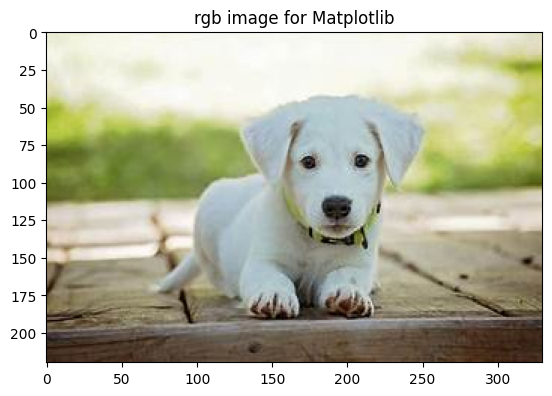

In [9]:
# Your code here
# Use cv.cvtColor()

img= cv2.imread(path)
hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
rgb_img =cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
LAB_image = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
L,A,B = cv2.split(LAB_image)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(rgb_img)
plt.title('rgb image for Matplotlib')
plt.show()
cv2.imshow("HSV Image", hsv_image)
cv2.imshow("LAB Image", LAB_image)
cv2.imshow("Grayscale Image", gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Task 10: Image Sharpening
Apply cv2.blur() with a 5x5 kernel, then use cv2.filter2D() with sharpening kernels of varying strengths (e.g., [[0, -1, 0], [-1, 5, -1], [0, -1, 0]] and [[0, -2, 0], [-2, 9, -2], [0, -2, 0]]).
Compare between original and sharpened image after blurring.

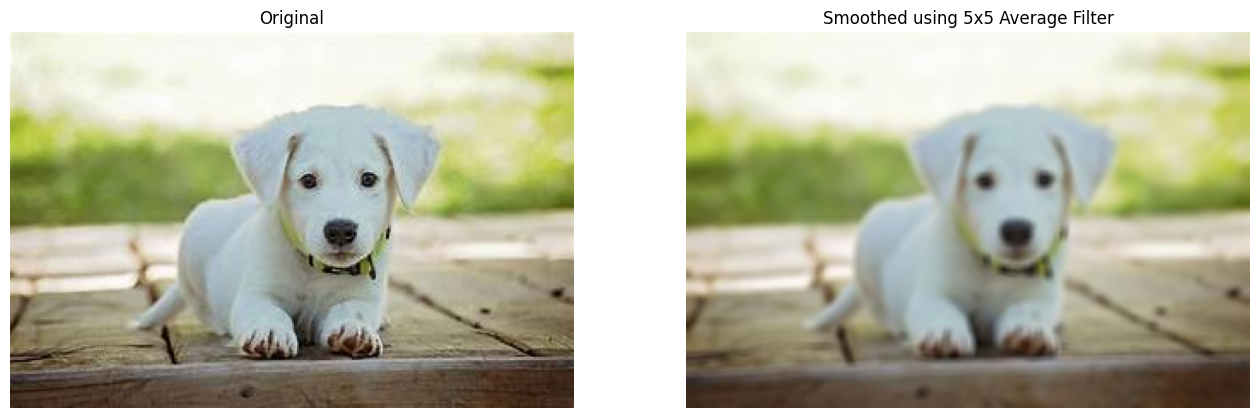

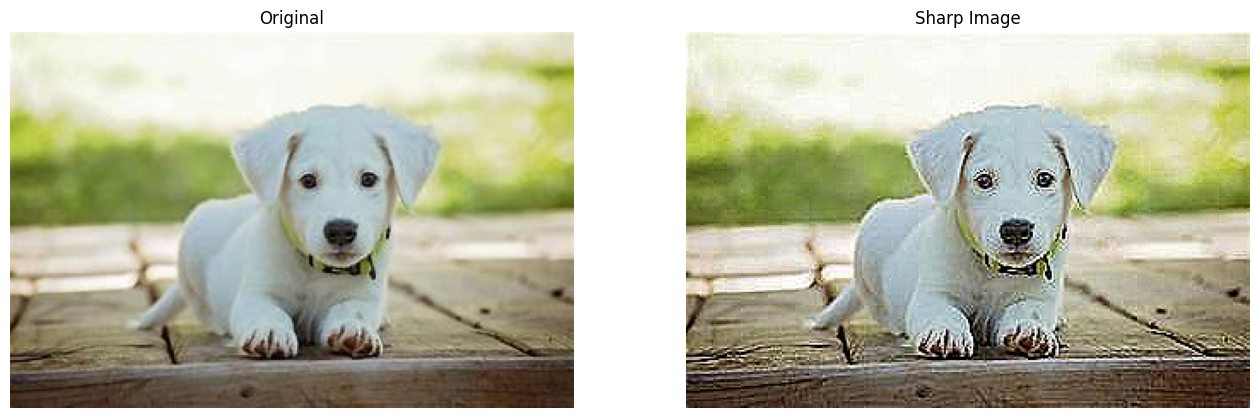

In [10]:
# Your code here
def pair_plot(img1, img2, title1="Original", title2="Filtered"):
    fig = plt.figure(figsize=(16, 16))
    fig.add_subplot(1,2,1)
    plt.imshow(img1)
    plt.title(title1)
    plt.axis("off")
    fig.add_subplot(1,2,2)
    plt.imshow(img2)
    plt.title(title2)
    plt.axis("off")

# Use cv2.blur
blurimag = cv2.blur(rgb_img ,ksize = (5,5))
pair_plot(rgb_img, blurimag, title1="Original", title2="Smoothed using 5x5 Average Filter")

# Define sharpen kernel, use cv2.filter2D()
sharpen_filter = np.array([[0,-1, 0],
                          [-1, 5,-1],
                          [0,-1, 0]])
sharp = cv2.filter2D(rgb_img, -1, sharpen_filter)
pair_plot(rgb_img, sharp, 'Original', 'Sharp Image')

### Task 11: Add Salt and Pepper Noise to Image
Implement a function to add salt and pepper noise to an image. Control noise density (e.g., 0.05).

In [14]:
# Your code here
from skimage.util import random_noise
def add_salt_pepper_noise(image, density=0.05):
    # Add salt & pepper noise
    noisy = random_noise(image, mode="s&p", amount=density)
    noisy = np.array(255 * noisy, dtype="uint8")
    return noisy

noisy = add_salt_pepper_noise(gray)
cv2.imshow("Noisy Image", noisy)
cv2.waitKey(0)
cv2.destroyAllWindows()
# Apply to an image and display

### Task 12: Remove Salt and Pepper Noise Using Median Filter
Apply cv.medianBlur() to a noisy image. Experiment with kernel sizes (3,5,7) and compare results.

In [15]:
# Your code here
outMed = cv2.medianBlur(noisy, 5)
cv2.imshow("Median Blurred Image", outMed)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Task 13: Implement Adaptive Median Filter
Write a custom function for adaptive median filtering. It should dynamically increase window size until noise is removed or max size is reached. Apply to a noisy image and compare with standard median.

In [17]:
# Your code here
def adaptive_median_filter(image, max_size=7):
    rows, cols = image.shape
    output = np.copy(image)

    for i in range(rows):
        for j in range(cols):
            S = 3
            done = False

            while not done:
                k = S // 2
                rmin, rmax = max(0, i-k), min(rows, i+k+1)
                cmin, cmax = max(0, j-k), min(cols, j+k+1)
                window = image[rmin:rmax, cmin:cmax].flatten()

                Zmin = np.min(window)
                Zmax = np.max(window)
                Zmed = np.median(window)
                Zxy = image[i, j]

                A1 = Zmed - Zmin
                A2 = Zmed - Zmax

                if A1 > 0 and A2 < 0:
                    B1 = Zxy - Zmin
                    B2 = Zxy - Zmax
                    if B1 > 0 and B2 < 0:
                        output[i, j] = Zxy
                    else:
                        output[i, j] = Zmed
                    done = True
                else:
                    S += 2
                    if S > max_size:
                        output[i, j] = Zmed
                        done = True

    return output

# Test on noisy image
filter_img = adaptive_median_filter(noisy)
cv2.imshow("Filtered Image", filter_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\Home\AppData\Local\Temp\ipykernel_22380\3751877600.py:27: RuntimeWarning: overflow encountered in scalar subtract
  B2 = Zxy - Zmax


### Task 14: Implement Bilateral Filter Function
Write a Python function to perform bilateral filtering on an image. Use Gaussian weights for both spatial and intensity. Parameters: diameter, sigma_color, sigma_space. Compare with cv.bilateralFilter().

In [18]:
# Your code here
def custom_bilateral_filter(image, diameter, sigma_color, sigma_space):
    # Implement using nested loops or vectorized (efficiently)
    # For each pixel, compute weighted sum based on distance and intensity diff
    pass

bilateral = cv.bilateralFilter(img, d=5, sigmaColor=75, sigmaSpace=75)
cv2.imshow("Bilateral Filtered Image", bilateral)
cv2.waitKey(0)
cv2.destroyAllWindows()
# Apply to image, display, and compare with OpenCV's version

### [BONUS] Task 15: Comprehensive Camera Task
Combine: Live camera feed -> grayscale -> add noise -> remove with median -> sharpen. Display all stages in separate windows.

In [19]:
# To read video from camera example:

camera_id = 0
delay = 30
window_name = 'frame'

cap = cv2.VideoCapture(camera_id)

def apply_median_filter(image, ksize=3):
    return cv2.medianBlur(image, ksize)

# --- Sharpening ---
def sharpen_image(image):
    sharpen_filter = np.array([[0,-1, 0],
                          [-1, 5,-1],
                          [0,-1, 0]])
    return cv2.filter2D(image, -5, sharpen_filter)


if not cap.isOpened():
    sys.exit()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

     # 1. Grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 2. Add noise
    noisy = add_salt_pepper_noise(frame)

    # 3. Median filter
    Med = cv2.medianBlur(noisy, 3)

    # 4. Sharpen
    sharp = sharpen_image(Med)

    # Show all results
    cv2.imshow("Gray", gray)
    cv2.imshow("Noisy", noisy)
    cv2.imshow("Median Denoised", Med)
    cv2.imshow("Sharpened", sharp)
    cv2.imshow(window_name, frame)
    if cv2.waitKey(delay) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()

### [BONUS]Task 16: Comprehensive Video Task
Similar to Task 18 but for a video file. Save the final processed video.

In [6]:
import cv2 as cv
import numpy as np
import sys

def apply_median_filter(image, ksize=3):
    return cv.medianBlur(image, ksize)

def sharpen_image(image):
    sharpen_filter = np.array([[0, -1,  0],
                               [-1,  5, -1],
                               [0, -1,  0]])
    return cv.filter2D(image, -1, sharpen_filter)

from skimage.util import random_noise
def add_salt_pepper_noise(image, density=0.05):
    # Add salt & pepper noise
    noisy = random_noise(image, mode="s&p", amount=density)
    noisy = np.array(255 * noisy, dtype="uint8")
    return noisy

camera_id = 0
delay = 30
window_name = 'frame'

cap = cv.VideoCapture(camera_id)

fourcc = cv.VideoWriter_fourcc(*'XVID')
fps = int(cap.get(cv.CAP_PROP_FPS)) or 30
width, height = int(cap.get(cv.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
out = cv.VideoWriter("output.avi", fourcc, fps, (width, height))

if not cap.isOpened():
    sys.exit()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # 1. Grayscale
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    gray_bgr = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

    # 2. Add noise
    noisy = add_salt_pepper_noise(frame)

    # 3. Median filter
    Med = cv.medianBlur(noisy, 3)

    # 4. Sharpen
    sharp = sharpen_image(Med)

    top = np.hstack((frame, noisy, gray_bgr))
    bottom = np.hstack((Med, sharp, gray_bgr))
    combined = np.vstack((top, bottom))

    combined_video = cv.resize(combined, (width, height))

    # Show results
    cv.imshow("Gray", gray)
    cv.imshow("Noisy", noisy)
    cv.imshow("Median Denoised", Med)
    cv.imshow("Sharpened", sharp)
    cv.imshow(window_name, frame)
    cv.imshow("Combined", combined_video)

    out.write(combined_video)

    if cv.waitKey(delay) & 0xFF == 27:
        break

cap.release()
out.release()
cv.destroyAllWindows()


### Task 17: Performance Comparison
Time the execution of standard median vs adaptive median on a large noisy image. Discuss when adaptive median filter is better.

In [ ]:
import time
# Your code here
# Use time.time() to measure
start = time.time()
medianblur = cv.medianBlur(noisy, 3)
print("Standard Median Time:", time.time() - start, "seconds")


start = time.time()
adaptive = adaptive_median_filter(noisy, max_size=7)
print("Adaptive Median Time:", time.time() - start, "seconds")

Standard Median Time: 0.0016112327575683594 seconds


ValueError: too many values to unpack (expected 2)